## Extracting and Cleaning Movies Data till 2016 from Kaggle Dataset

The Kaggle dataset is hollywood movies and has data till 2016 only

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie=pd.read_csv('movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# number of rows and columns
movie.shape

(5043, 28)

In [4]:
# all the columns in the data
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# movie data till 2016 with the number of movies release each year
movie.title_year.value_counts(dropna=False).sort_index()

1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2013.0    237
2014.0    252
2015.0    226
2016.0    106
NaN       108
Name: title_year, Length: 92, dtype: int64

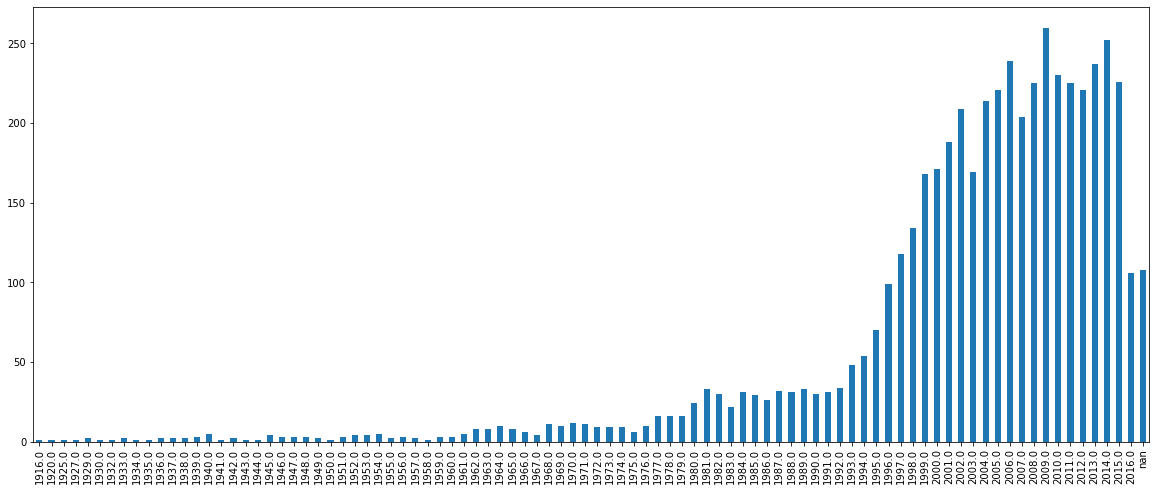

In [6]:

import matplotlib.pyplot as plt
movie.title_year.value_counts(dropna=False).sort_index().plot(kind='bar',figsize=(20,8))
plt.show()
# shows we have movie data till 2016 with the number of movies release each year

In [7]:
# taking in only those features on which the recommendation would be based on

movie= movie.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [8]:
# finding the null/nan fields in the dataset

movie.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [9]:
#data cleaning

movie['actor_1_name']=movie['actor_1_name'].replace(np.nan,'UNKNOWN')
movie['actor_2_name']=movie['actor_2_name'].replace(np.nan,'UNKNOWN')
movie['actor_3_name']=movie['actor_3_name'].replace(np.nan,'UNKNOWN')
movie['director_name']=movie['director_name'].replace(np.nan,'UNKNOWN')

In [10]:
movie.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [11]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,UNKNOWN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
#removing the bar which is used to separate the different genre for a single movie 

movie['genres']=movie['genres'].str.replace('|',' ')  
#str is used to convert panda series to string for replace to word for string matching

In [13]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,UNKNOWN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [14]:
movie['movie_title']=movie['movie_title'].str.lower()

In [15]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,UNKNOWN,Documentary,star wars: episode vii - the force awakens ...


In [16]:

movie['movie_title'][1]
# there is null terminating character at the end of each movie_title

"pirates of the caribbean: at world's end\xa0"

In [17]:
# removing the null terminating character at the end of each movie_title
movie['movie_title']=movie['movie_title'].apply(lambda x:x[:-1])

In [18]:
movie['movie_title'][1]

"pirates of the caribbean: at world's end"

In [19]:
movie.to_csv('data.csv',index=False)